In [1]:
import findspark
findspark.init()
import pyspark
import warnings
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from math import sqrt
spark=SparkSession.builder.appName('Assignment_4_and_5_Part2').getOrCreate()
#READING DATASET 
data=(spark.read.option('header','true').csv('Pre_Processed_Data.csv', sep="," , inferSchema=True)).persist()
data=data.drop('_c0')
from sklearn.metrics.cluster import normalized_mutual_info_score

In [2]:
data.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Length: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Actor: string (nullable = true)
 |-- Actress: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- Awards: string (nullable = true)
 |-- Image: string (nullable = true)



In [3]:
%matplotlib inline 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

def detect_outliers(data):    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            #it doesn't falling in 3rd standard deviation then it is oulier
            outliers.append(i)
    return outliers

columns = data.select('Year','Length','Popularity')

data_p = np.array(columns.collect())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


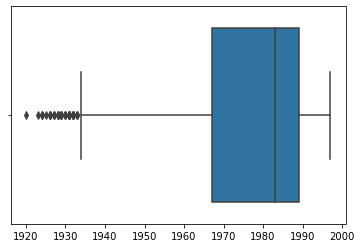

In [4]:
outliers=[]
outlier_pt1=detect_outliers(data_p[:,0])
sns.boxplot(data_p[:,0])
warnings.filterwarnings('ignore')

## The Box Plot shows that the values before 1930 are clearly Outliers

In [5]:
# Now Lets check with Z-Score with 99.7% of the data points lie between +/- 3 standard deviation let's check what are the outliers
print("Outlier for Year",sorted(outlier_pt1))

Outlier for Year [1920, 1923, 1924, 1924, 1924]


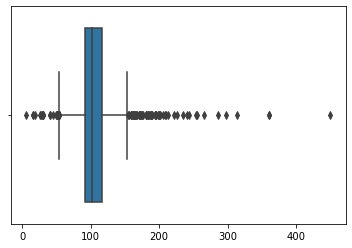

In [6]:
outliers=[]
outlier_pt2=detect_outliers(data_p[:,1])
sns.boxplot(data_p[:,1])
warnings.filterwarnings('ignore')

## This shows that the value between 90 to approximately 120 are not outliers the dotted shows that these are outliers for example 5,15, 200 all of them are outliers

In [7]:
# Now Lets check with Z-Score with 99.7% of the data points lie between +/- 3 standard deviation let's check what are the outliers
print("Outlier for Length",sorted(outlier_pt2))

Outlier for Length [5, 15, 198, 199, 200, 201, 201, 206, 208, 210, 213, 221, 226, 234, 240, 243, 253, 255, 265, 286, 298, 313, 360, 360, 450]


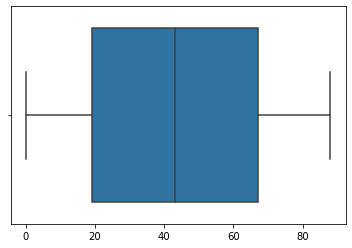

In [8]:
outliers=[]
outlier_pt3=detect_outliers(data_p[:,2]) #it returns empty so no outliers or noise for Popularity
sns.boxplot(data_p[:,2])
warnings.filterwarnings('ignore')

In [9]:
print("Outlier for Popularity",sorted(outlier_pt3)) # No Outliers

Outlier for Popularity []


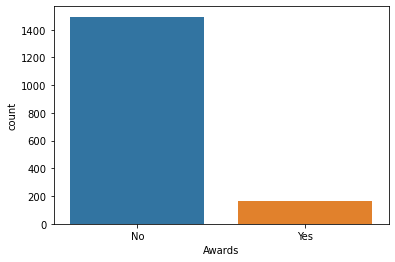

In [10]:
dt = data
dt = dt.toPandas()
aw= sns.countplot(x="Awards", data=dt)
plt.show()

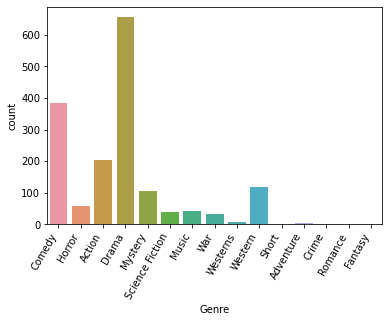

In [11]:
g = sns.countplot(x="Genre", data=dt);
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right")
plt.show()

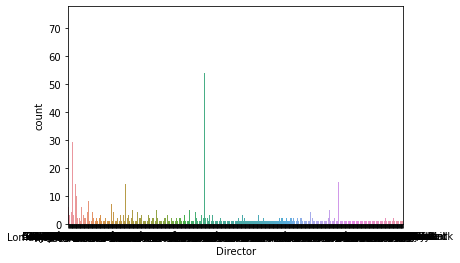

In [12]:
sns.countplot(x='Director', data =dt)
plt.show()

## C. Analyze Numeric Attributes using Measures of Central Tendancy

In [13]:
import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import lower, col , avg,min,max,mean
from statistics import pvariance
import sys

import pandas as pd
import numpy as np
from scipy import stats

data.describe('Popularity', 'Year', 'Length').show()

columns = data.select('Year','Length','Popularity')
data2 = np.array(columns.collect())

print("Mean of Year is :" ,np.mean(data2[:,0]))
print("Mean of Length is :" ,np.mean(data2[:,1]))
print("Mean of Popularity is :" ,np.mean(data2[:,2]))

print("Median of Year is :" ,np.median(data2[:,0]))
print("Median of Length is :" ,np.median(data2[:,1]))
print("Median of Popularity is :",np.median(data2[:,2]))

print("Mode of Year is :" , stats.mode(data2[:,0])[0])
print("Mode of Length is :" , stats.mode(data2[:,1])[0])
print("Mode of Popularity is :" , stats.mode(data2[:,2])[0])
data.agg({'Year': 'Variance'}).show()
data.agg({'Length': 'Variance'}).show() 
data.agg({'Popularity': 'Variance'}).show() 
print("Range of Year is : % s" %(np.ptp(data2[:,0], axis=0)))
print("Range of Length is : % s" %(np.ptp(data2[:,1], axis=0)))
print("Range of Popularity is : % s" %(np.ptp(data2[:,2], axis=0)))
print("Correlation Between Year and Length",data.corr('Year','Length'))
print("Correlation Between Year and Popularity",data.corr('Year','Popularity'))
print("Correlation Between Length and Popularity",data.corr('Length','Popularity'))

+-------+------------------+------------------+------------------+
|summary|        Popularity|              Year|            Length|
+-------+------------------+------------------+------------------+
|  count|              1657|              1657|              1657|
|   mean|43.090525045262524| 1975.814121907061|105.07724803862402|
| stddev| 26.70357976467417|17.058629178126303|29.994827575950893|
|    min|                 0|              1920|                 5|
|    max|                88|              1997|               450|
+-------+------------------+------------------+------------------+

Mean of Year is : 1975.814121907061
Mean of Length is : 105.07724803862402
Mean of Popularity is : 43.090525045262524
Median of Year is : 1983.0
Median of Length is : 102.0
Median of Popularity is : 43.0
Mode of Year is : [1991]
Mode of Length is : [90]
Mode of Popularity is : [8]
+------------------+
|    variance(Year)|
+------------------+
|290.99682943682205|
+------------------+

+-------

## Discretization or Normalization

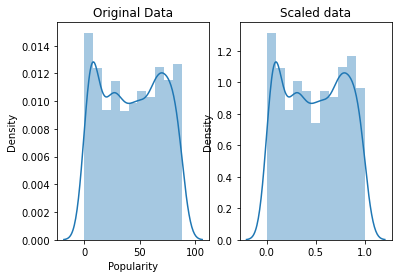

In [14]:
 
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

org = data.toPandas()
org = org.drop(['Title','Genre', 'Actor', 'Actress', 'Director','Awards','Image'],axis=1)
# mix-max scale the data  
scaled_data = minmax_scaling(org['Popularity'],columns=[0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(org['Popularity'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
warnings.filterwarnings('ignore')

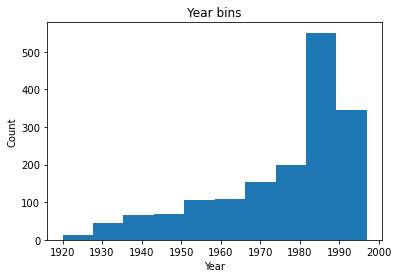

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(org["Year"])
# set x/y labels and plot title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year bins")
bins = np.linspace(org["Year"].min(), org["Year"].max(), 4)

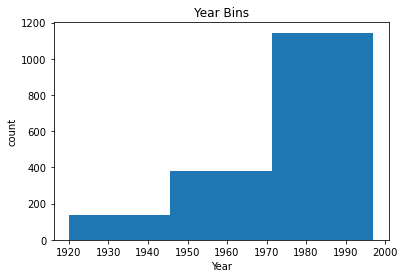

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

a = (0, 1, 2)

# draw histogram of attribute 
plt.hist(org["Year"], bins = 3)

# set x / y labels and plot title 
plt.xlabel("Year")
plt.ylabel("count")
plt.title("Year Bins")
plt.show()

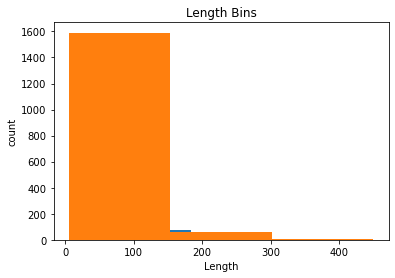

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(org["Length"])
# set x/y labels and plot title
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Length bins")
bins = np.linspace(org["Length"].min(), org["Length"].max(),1)
a = (0, 1, 2)

# draw histogram of attribute 
plt.hist(org["Length"], bins = 3)

# set x / y labels and plot title 
plt.xlabel("Length")
plt.ylabel("count")
plt.title("Length Bins")
plt.show()

# Assignment 4 on Second Dataset

In [18]:
import findspark
findspark.init()
import pyspark

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('TextFile_A4').getOrCreate()

data2 =  spark.read.option("header", "false").csv("A4dataset2.txt", sep="    " , inferSchema=True).persist()

data2.collect()
data2=data2.drop('_c0')
data2.printSchema()

root
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)



| Attribute | Type | Reason |
| ----------|------|--------------------------------------------------------------------------------------------------------- |
| Column1 | Ratio  | Since the attribute has all the properties of an interval variable, and also has a clear definition of 0.0 and hence this attribute lies in the Ratio Type |
| Column2 | Ratio | Since the attribute has all the properties of an interval variable, and also has a clear definition of 0.0 and hence this attribute lies in the Ratio Type |

In [19]:
df = data2.selectExpr("_c1 as Column1", "_c2 as Column2")
df.filter(df.Column1.isNull()).show(5)
df.filter(df.Column2.isNull()).show(5)

+-------+-------+
|Column1|Column2|
+-------+-------+
+-------+-------+

+-------+-------+
|Column1|Column2|
+-------+-------+
+-------+-------+



# Since we have no null values no need to impute anything here

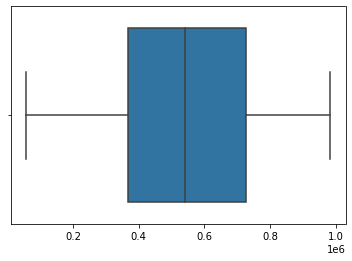

In [20]:
columns = df.select('Column1','Column2')

data_p = np.array(columns.collect())
outliers=[]
outlier_pt1=detect_outliers(data_p[:,0])
sns.boxplot(data_p[:,0])
warnings.filterwarnings('ignore')

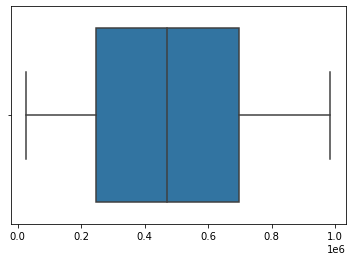

In [21]:
data_p = np.array(columns.collect())
outliers=[]
outlier_pt2=detect_outliers(data_p[:,1])
sns.boxplot(data_p[:,1])
warnings.filterwarnings('ignore')

In [22]:
print("Outlier for Column1",sorted(outlier_pt1)) # No Outliers
print("Outlier for Column2",sorted(outlier_pt2)) # No Outliers

Outlier for Column1 []
Outlier for Column2 []


In [23]:
import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import lower, col , avg,min,max,mean
from statistics import pvariance
import sys

import pandas as pd
import numpy as np
from scipy import stats

df.describe('Column1', 'Column2').show()

columns = df.select('Column1','Column2')
data2 = np.array(columns.collect())

print("Mean of Column1 is :" ,np.mean(data2[:,0]))
print("Mean of Column2 is :" ,np.mean(data2[:,1]))

print("Median of Column1 is :" ,np.median(data2[:,0]))
print("Median of Column2 is :" ,np.median(data2[:,1]))

print("Mode of Column1 is :" , stats.mode(data2[:,0])[0])
print("Mode of Column2 is :" , stats.mode(data2[:,1])[0])

df.agg({'Column1': 'Variance'}).show()
df.agg({'Column2': 'Variance'}).show() 

print("Range of Column1 is : % s" %(np.ptp(data2[:,0], axis=0)))
print("Range of Column2 is : % s" %(np.ptp(data2[:,1], axis=0)))
print("Correlation Between Column1 and Column2",df.corr('Column1','Column2'))

+-------+------------------+------------------+
|summary|           Column1|           Column2|
+-------+------------------+------------------+
|  count|              5000|              5000|
|   mean|       525659.3564|       477365.5364|
| stddev|220767.92972758578|233838.90661154944|
|    min|           55608.0|           25631.0|
|    max|          983609.0|          984555.0|
+-------+------------------+------------------+

Mean of Column1 is : 525659.3564
Mean of Column2 is : 477365.5364
Median of Column1 is : 539262.0
Median of Column2 is : 471640.5
Mode of Column1 is : [160154.]
Mode of Column2 is : [144848.]
+--------------------+
|   variance(Column1)|
+--------------------+
|4.873847879620425...|
+--------------------+

+--------------------+
|   variance(Column2)|
+--------------------+
|5.468063424528494E10|
+--------------------+

Range of Column1 is : 928001.0
Range of Column2 is : 958924.0
Correlation Between Column1 and Column2 0.13278911382081576


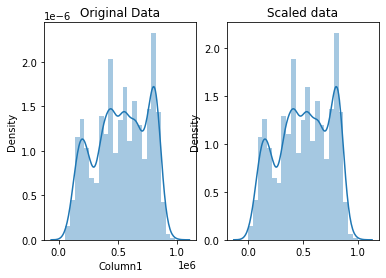

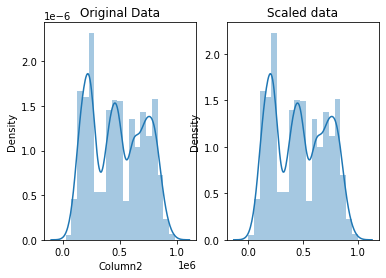

In [24]:
## Discretization or Normalization
 
import pandas as pd
import numpy as np

 
from scipy import stats

 
from mlxtend.preprocessing import minmax_scaling
 
import seaborn as sns
import matplotlib.pyplot as plt

org = df.toPandas()

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(org['Column1'],columns=[0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(org['Column1'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
warnings.filterwarnings('ignore')


scaled_data2 = minmax_scaling(org['Column2'],columns=[0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(org['Column2'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data2, ax=ax[1])
ax[1].set_title("Scaled data")
warnings.filterwarnings('ignore')

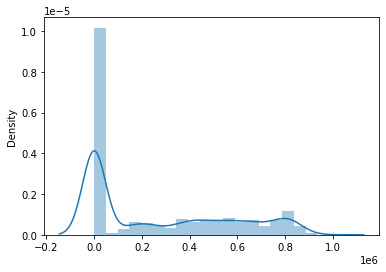

In [25]:
from pyspark.ml.feature import QuantileDiscretizer, Bucketizer
from pyspark.sql.functions import udf
import pyspark.sql.functions as f
from pyspark.sql.types import IntegerType,StringType

minimum=df.agg(f.min("Column1")).collect()[0][0]
maximum=df.agg(f.max("Column1")).collect()[0][0]
buckets=int(np.ceil((maximum-minimum)/15))

qds = QuantileDiscretizer(numBuckets=buckets, inputCol="Column1", outputCol="LengthBin", relativeError=0.01, handleInvalid="error")
bucketizer = qds.fit(df)
a = bucketizer.setHandleInvalid("skip").transform(df).select('Column1','LengthBin').sort('Column1').collect()
sns.distplot(a)
plt.show()
warnings.filterwarnings('ignore')

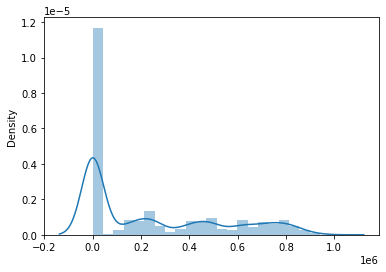

In [26]:
from pyspark.ml.feature import QuantileDiscretizer, Bucketizer
from pyspark.sql.functions import udf
import pyspark.sql.functions as f
from pyspark.sql.types import IntegerType,StringType

minimum=df.agg(f.min("Column2")).collect()[0][0]
maximum=df.agg(f.max("Column2")).collect()[0][0]
buckets=int(np.ceil((maximum-minimum)/15))

qds = QuantileDiscretizer(numBuckets=buckets, inputCol="Column2", outputCol="LengthBin", relativeError=0.01, handleInvalid="error")
bucketizer = qds.fit(df)
a = bucketizer.setHandleInvalid("skip").transform(df).select('Column2','LengthBin').sort('Column2').collect()
sns.distplot(a)
plt.show()
warnings.filterwarnings('ignore')

# Assignment 5

In [27]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics.cluster import normalized_mutual_info_score

# Loads data.
data=(spark.read.option('header','true').csv('Pre_Processed_Data.csv', sep="," , inferSchema=True)).persist()
dataset=data.drop('_c0','Title','Genre', 'Actor', 'Actress', 'Director','Awards','Image')
assemble=VectorAssembler(inputCols=[
 'Year',
 'Length',
 'Popularity'], outputCol='features')
assembled_data=assemble.transform(dataset)

from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
silhouette_score=[]
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance for k = 2 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance for k = 2 = 0.4579375514358384
Cluster Centers: 
[1974.1822542   104.87410072   66.37170264]
[1977.46780073  105.28311057   19.4981774 ]
Within Set Sum of Squared Error = [17.04051280316536, 50.9421004191285]
Normalized Mutual Index = [1.0, 1.0]


In [28]:
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance for k = 3 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance for k = 3 = 0.5161197274087755
Cluster Centers: 
[1974.25725095  100.79445145   66.28121059]
[1977.80783818  100.89759798   19.68900126]
[1971.12328767  196.89041096   44.73972603]
Within Set Sum of Squared Error = [18.839894002183993, 51.52139232461058, 99.71685472643122]
Normalized Mutual Index = [1.0, 1.0, 1.0]


In [29]:
# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 4 = " + str(silhouette))

silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 4 = 0.49726787009203516
Cluster Centers: 
[1974.45726496   95.87037037   66.36039886]
[1977.85615491   98.80636238   18.46749654]
[1964.78571429  286.           45.71428571]
[1974.11926606  143.90366972   49.65137615]
Within Set Sum of Squared Error = [21.752484851975108, 53.176018198645956, 185.91314902284842, 49.08192081369391]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0]


In [30]:
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 5 = " + str(silhouette))
silhouette_score.append(silhouette)

# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 5 = 0.44423683857046137
Cluster Centers: 
[1976.32692308  124.44871795   62.00320513]
[1981.38498403  103.12779553   16.3370607 ]
[1969.5         212.67307692   42.36538462]
[1944.45333333   84.56444444   49.68      ]
[1984.26923077   91.9479638    64.36199095]
Within Set Sum of Squared Error = [20.09434238144985, 53.46932064427942, 115.47373161159942, 67.10316980240844, 50.79216710744815]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0]


In [31]:
# Trains a k-means model.
kmeans = KMeans().setK(6).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 6 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 6 = 0.3801598342095096
Cluster Centers: 
[1977.66544118  124.29044118   65.05882353]
[1977.60117302  119.19354839   14.95014663]
[1983.8714653    93.57583548   67.73521851]
[1943.41176471   87.26244344   51.67420814]
[1983.81933842   88.50636132   22.63104326]
[1970.14634146  224.19512195   47.41463415]
Within Set Sum of Squared Error = [18.369204856701778, 55.065193624338505, 15.372636723533503, 67.52298584066247, 11.770287731836257, 87.62301287609797]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [32]:
# Trains a k-means model.
kmeans = KMeans().setK(7).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 7 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 7 = 0.37064103114728414
Cluster Centers: 
[1983.2997543    89.86240786   20.5970516 ]
[1943.52252252   86.97297297   51.13063063]
[1971.03225806  177.88709677   46.96774194]
[1968.54545455  302.09090909   43.72727273]
[1977.66770186  117.66149068   66.38198758]
[1985.41463415   90.24695122   66.80792683]
[1978.28196721  119.3147541    16.34754098]
Within Set Sum of Squared Error = [52.33288269445365, 56.71060417955538, 81.41618680253417, 184.29698902936332, 57.479119565179445, 49.82587038335262, 19.32969387509863]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [33]:
# Trains a k-means model.
kmeans = KMeans().setK(8).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 8 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 8 = 0.408660188048697
Cluster Centers: 
[1980.52494062  109.03562945   11.40142518]
[1962.1031746    65.20634921   24.69047619]
[1979.7260274   124.21004566   68.0913242 ]
[1963.45454545  301.54545455   51.36363636]
[1972.796875  176.484375   37.921875]
[1984.17957746   92.53873239   72.69014085]
[1945.19786096   95.40106952   61.87165775]
[1983.25217391   98.71884058   38.75942029]
Within Set Sum of Squared Error = [57.41980645916998, 70.67513301584772, 23.198363087883113, 185.8388842763831, 86.0406923055706, 47.707030371588004, 61.87608287966914, 12.201708090233165]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


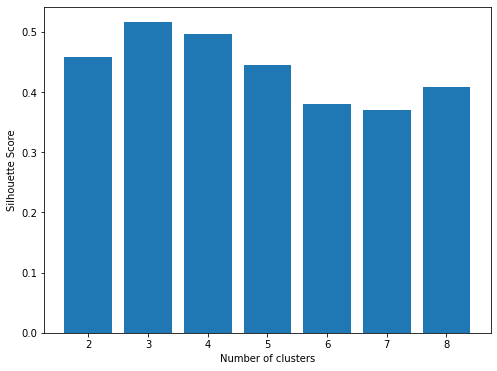

In [34]:
#Visualizing the silhouette scores in a plot

import matplotlib.pyplot as plt
k = [2, 3, 4, 5, 6,7,8] 
fig, ax = plt.subplots(1,1, figsize =(8,6))
plt.bar(k,silhouette_score)
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [35]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

# Loads data.
data2 =  spark.read.option("header", "false").csv("A4dataset2.txt", sep="    " , inferSchema=True).persist()

data2=data2.drop('_c0')

df = data2.selectExpr("_c1 as Column1", "_c2 as Column2")
assemble=VectorAssembler(inputCols=[
 'Column1',
 'Column2'], outputCol='features')
assembled_data=assemble.transform(df)

from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
silhouette_score=[]
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance for k = 2 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance for k = 2 = 0.5722982025192378
Cluster Centers: 
[603467.33476764 692357.33562823]
[458086.20926756 290653.67488789]
Within Set Sum of Squared Error = [248617.06196427115, 500586.6346872325]
Normalized Mutual Index = [1.0, 1.0]


In [36]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

# Loads data.
data2 =  spark.read.option("header", "false").csv("A4dataset2.txt", sep="    " , inferSchema=True).persist()

data2=data2.drop('_c0')

df = data2.selectExpr("_c1 as Column1", "_c2 as Column2")
assemble=VectorAssembler(inputCols=[
 'Column1',
 'Column2'], outputCol='features')
assembled_data=assemble.transform(df)

from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
silhouette_score=[]
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance for k = 3 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance for k = 3 = 0.5434385882340155
Cluster Centers: 
[500724.52964602 257534.00752212]
[741651.85074627 672435.42146411]
[339951.38109527 644174.18379595]
Within Set Sum of Squared Error = [512582.65575508965, 76867.23566034321, 529432.2935122066]
Normalized Mutual Index = [1.0, 1.0, 1.0]


In [37]:
# Trains a k-means model.
kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 4 = " + str(silhouette))

silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 4 = 0.6241291870044543
Cluster Centers: 
[276208.36804049 324984.9978308 ]
[656487.59757024 256869.23766135]
[408317.85826002 728839.13489736]
[754892.14878622 668343.1550509 ]
Within Set Sum of Squared Error = [649222.1191778906, 417295.15622794675, 475244.79559665656, 176273.20701083774]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0]


In [38]:
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 5 = " + str(silhouette))
silhouette_score.append(silhouette)

# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 5 = 0.5958639253140531
Cluster Centers: 
[185068.55481283 361389.57486631]
[727333.54274611 199761.10492228]
[407572.09819639 734796.93887776]
[754643.66974596 663964.82832948]
[457586.58241758 309784.48858833]
Within Set Sum of Squared Error = [715715.4233419113, 452139.76071453246, 477500.81066558615, 175039.62689312967, 506087.8025608831]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0]


In [39]:
# Trains a k-means model.
kmeans = KMeans().setK(6).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 6 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 6 = 0.5723126844748061
Cluster Centers: 
[184934.31325301 361668.28380187]
[727295.92480211 195902.6055409 ]
[396597.25747863 726466.93803419]
[715506.48289474 764865.74078947]
[454590.0637931  306500.08017241]
[777051.80751174 549853.19092332]
Within Set Sum of Squared Error = [715732.2365373013, 455936.09708680335, 486017.3435431596, 258369.64984801252, 510501.0356888243, 82844.16610247426]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [40]:
# Trains a k-means model.
kmeans = KMeans().setK(7).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 7 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 7 = 0.5941145934729072
Cluster Centers: 
[227982.62539022 368551.04890739]
[733836.48551724 195801.04689655]
[350673.1633888 674780.2526475]
[818646.6707132  720584.62670713]
[452656.93274854 218856.11695906]
[647538.57317073 464396.99237805]
[568024.86850153 788161.06727829]
Within Set Sum of Squared Error = [673419.8012099692, 454852.69005164586, 521701.653040664, 152192.58025315902, 572839.5557966921, 237946.5181587605, 300523.2797566922]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [41]:
# Trains a k-means model.

kmeans = KMeans().setK(8).setSeed(1)
model = kmeans.fit(data_scale_output)

# Make predictions
predictions = model.transform(data_scale_output)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance  for k = 8 = " + str(silhouette))
silhouette_score.append(silhouette)
# Shows the result.
centers = model.clusterCenters()
sse=[]
nm=[]
point = np.array(assembled_data.select('features').collect())
print("Cluster Centers: ")
i = 0
for center in centers:
    print(center)
    sse.append(sqrt(sum([x**2 for x in (point[i][0] - center)])))
    nm.append(normalized_mutual_info_score(point[i][0], center))
    i = i+1
    
print("Within Set Sum of Squared Error = " + str(sse))
print("Normalized Mutual Index = "+str(nm))
warnings.filterwarnings('ignore')

Silhouette with squared euclidean distance  for k = 8 = 0.604037718011563
Cluster Centers: 
[226248.8197065  368897.96750524]
[733112.48834019 196186.4005487 ]
[452854.535 588127.77 ]
[818845.6402439  721291.26829268]
[261567.67168675 736654.5753012 ]
[666014.59284497 464017.62691652]
[567542.64263804 788867.46319018]
[452004.36811594 220538.7       ]
Within Set Sum of Squared Error = [674872.9921106655, 454599.8126066075, 415888.8669791596, 152587.12955588306, 588150.9017209816, 223172.12450765586, 301317.2173120796, 583880.6417879385]
Normalized Mutual Index = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


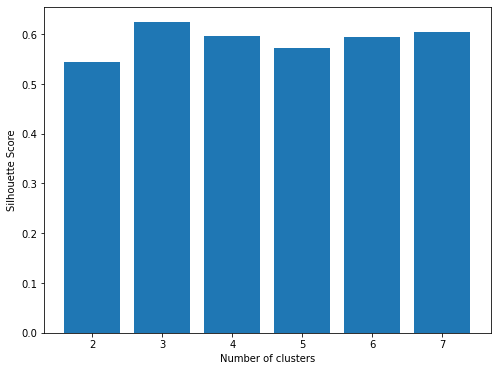

In [42]:
#Visualizing the silhouette scores in a plot

import matplotlib.pyplot as plt
k = [2, 3, 4, 5, 6,7]
fig, ax = plt.subplots(1,1, figsize =(8,6))
plt.bar(k,silhouette_score)
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()